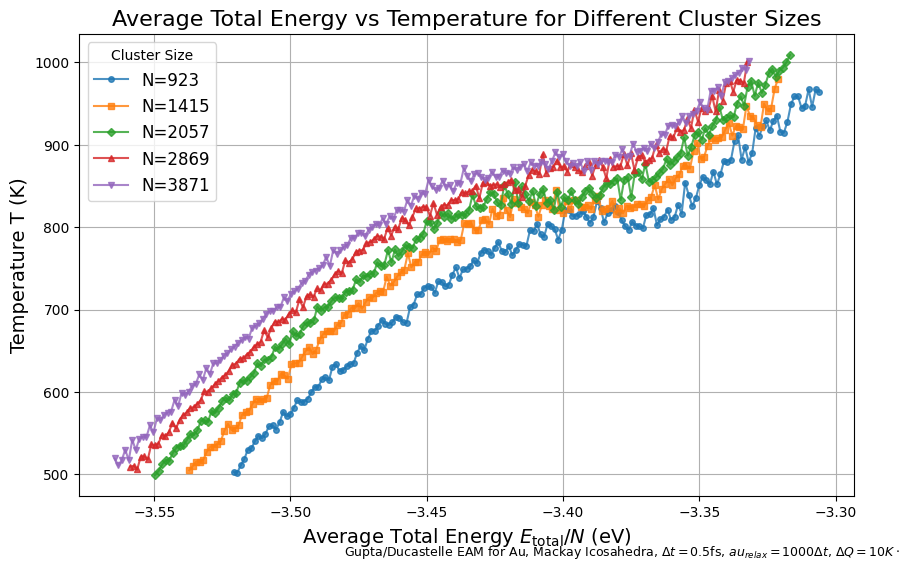

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Readings.csv'
data = pd.read_csv(file_path)

# Calculate the average total energy per atom
data['average_total_energy'] = data['total energy'] / data['Cluster size']

# Prepare the plot
plt.figure(figsize=(10, 6))

# Define a set of distinct markers to make the plot more accessible for color-blind individuals
markers = ['o', 's', 'D', '^', 'v', 'P', 'X']

# Plotting for different cluster sizes with temperature on the y-axis and average total energy on the x-axis
for i, cluster_size in enumerate(data['Cluster size'].unique()):
    subset = data[data['Cluster size'] == cluster_size]
    plt.plot(subset['average_total_energy'], subset['temperature'], linestyle='-', marker=markers[i % len(markers)], 
             markersize=4, label=f'N={cluster_size}', alpha=0.8)

# Adding labels and title
plt.ylabel('Temperature T (K)', fontsize=14)
plt.xlabel('Average Total Energy $E_{\mathrm{total}}/N$ (eV)', fontsize=14)
plt.title('Average Total Energy vs Temperature for Different Cluster Sizes', fontsize=16)

# Adding grid and legend
plt.grid(True)
plt.legend(title='Cluster Size', fontsize=12)

# Adding a small sentence at the bottom of the plot
plt.figtext(0.39, 0.01, 'Gupta/Ducastelle EAM for Au, Mackay Icosahedra, $\Delta t=0.5$fs, $\tau_{relax} = 1000\Delta t$, $\Delta Q = 10K \cdot \frac{3}{2}N k_B$', 
            ha='left', fontsize=9, color='black')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

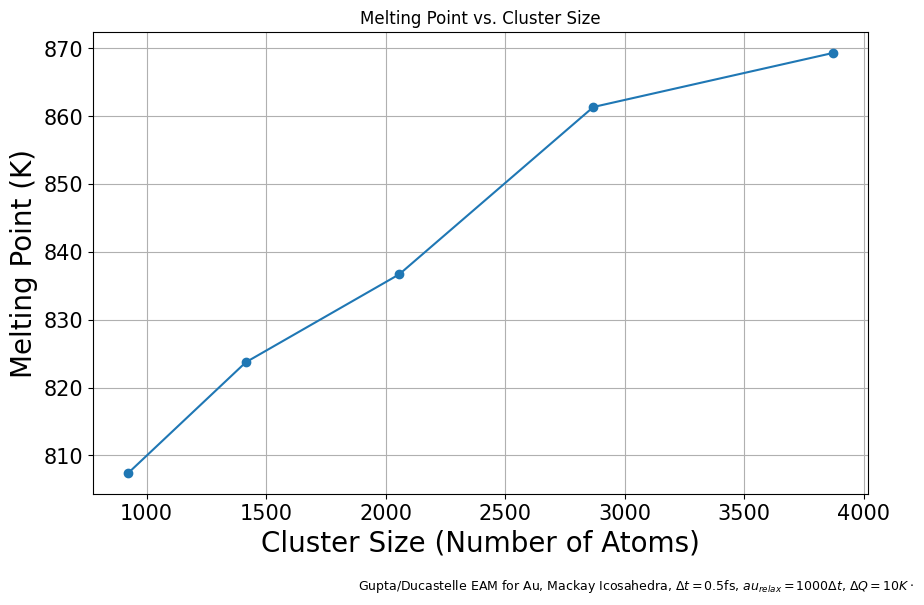

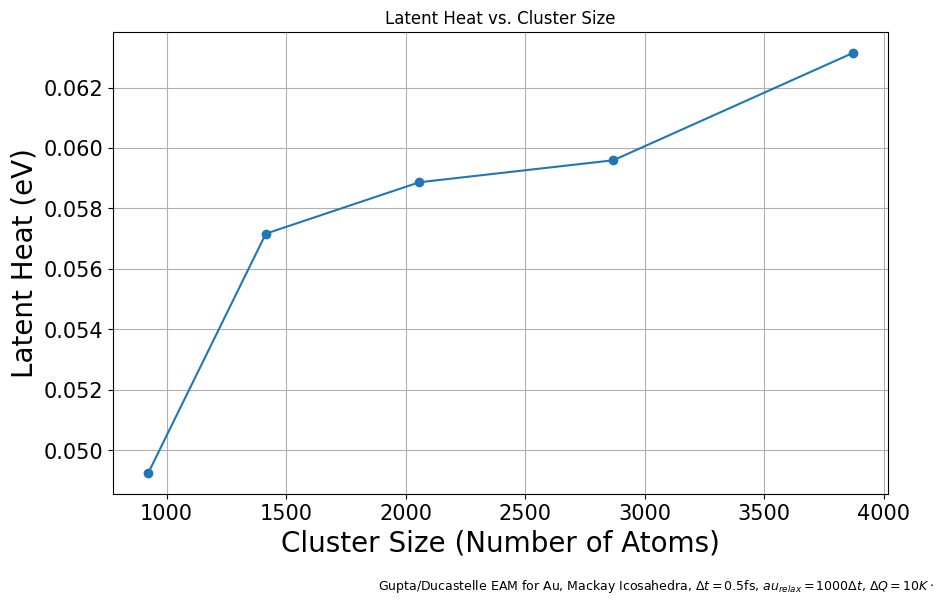

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model for latent heat
def model_latent_heat(x, slope1: float, slope2: float, temp_melt: float, energy_melt: float, latent_heat: float) -> float:
    res = np.zeros(len(x))
    low = x < energy_melt
    mid = (energy_melt < x) & (x < energy_melt + latent_heat)
    high = x > energy_melt + latent_heat
    
    res[low] = temp_melt + slope1 * (x[low] - energy_melt)
    res[mid] = temp_melt
    res[high] = temp_melt + slope2 * (x[high] - (energy_melt + latent_heat))
    
    return res

# Load the data from CSV
file_path = 'Readings.csv'
data = pd.read_csv(file_path)

# Group the data by cluster size
grouped_data = data.groupby('Cluster size')

# Prepare the plot
plt.figure(figsize=(10, 6))
melting_points = []
latent_heats = []
heat_capacities = []

# Iterate over each cluster size group
for cluster_size, group in grouped_data:
    x = group['total energy'] / cluster_size
    y = group['temperature']
    
    # Fit the model to the data with increased maxfev
    popt, _ = curve_fit(model_latent_heat, x, y, p0=np.array([3000, 3000, 700, -3.42, 0.05]), maxfev=5000)
    
    melting_points.append((cluster_size, popt[2]))
    latent_heats.append((cluster_size, popt[4] ))
    
    




# Plot melting point vs cluster size
melting_points = np.array(melting_points)
plt.figure(figsize=(10, 6))
plt.plot(melting_points[:, 0], melting_points[:, 1], '-o')
plt.xlabel('Cluster Size (Number of Atoms)', fontsize=20)
plt.ylabel('Melting Point (K)', fontsize=20)
plt.title('Melting Point vs. Cluster Size')
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Adding a small sentence at the bottom of the plot
plt.figtext(0.39, -0.05, 'Gupta/Ducastelle EAM for Au, Mackay Icosahedra, $\Delta t=0.5$fs, $\tau_{relax} = 1000\Delta t$, $\Delta Q = 10K \cdot \frac{3}{2}N k_B$', 
            ha='left', fontsize=9, color='black')
plt.show()

# Plot latent heat vs cluster size
latent_heats = np.array(latent_heats)
plt.figure(figsize=(10, 6))
plt.plot(latent_heats[:, 0], latent_heats[:, 1], '-o')
plt.xlabel('Cluster Size (Number of Atoms)', fontsize=20)
plt.ylabel('Latent Heat (eV)',  fontsize=20)
plt.title('Latent Heat vs. Cluster Size')
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Adding a small sentence at the bottom of the plot
plt.figtext(0.39, -0.05, 'Gupta/Ducastelle EAM for Au, Mackay Icosahedra, $\Delta t=0.5$fs, $\tau_{relax} = 1000\Delta t$, $\Delta Q = 10K \cdot \frac{3}{2}N k_B$', 
            ha='left', fontsize=9, color='black')
plt.show()





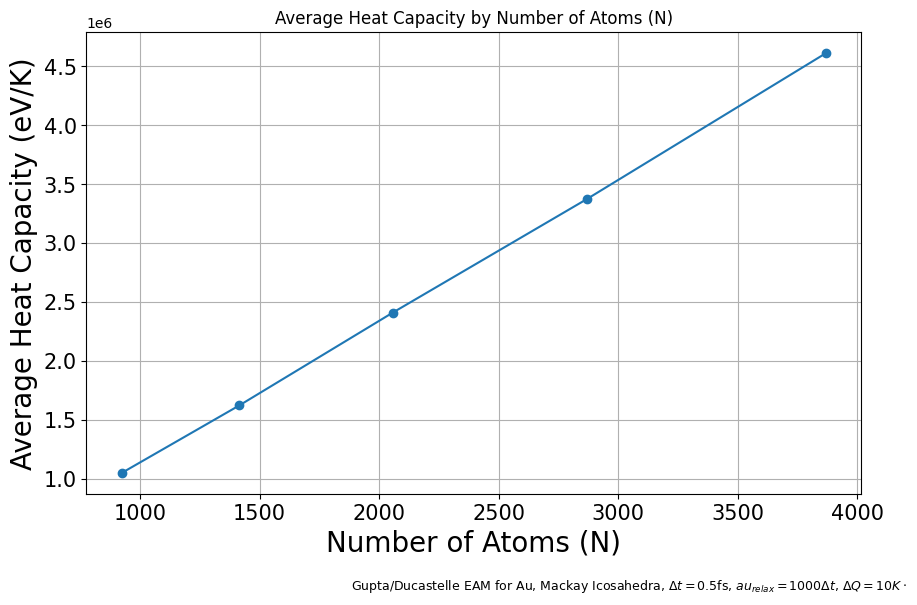

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Boltzmann constant in eV/K
k_B = 8.617333262145e-5

# Load the data from CSV
file_path = 'Readings.csv'
data = pd.read_csv(file_path)

# Convert kinetic energy to heat capacity in eV/K
data['heat capacity (eV/K)'] = data['kinetic energy'] / k_B

# Group the data by 'Cluster size' (number of atoms N) and calculate the mean heat capacity
heat_capacity_by_cluster = data.groupby('Cluster size')['heat capacity (eV/K)'].mean()

# Plot the heat capacities as a line chart
plt.figure(figsize=(10, 6))
heat_capacity_by_cluster.plot(kind='line', marker='o')
plt.xlabel('Number of Atoms (N)', fontsize=20)
plt.ylabel('Average Heat Capacity (eV/K)',  fontsize=20)
plt.title('Average Heat Capacity by Number of Atoms (N)')
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Adding a small sentence at the bottom of the plot
plt.figtext(0.39, -0.05, 'Gupta/Ducastelle EAM for Au, Mackay Icosahedra, $\Delta t=0.5$fs, $\tau_{relax} = 1000\Delta t$, $\Delta Q = 10K \cdot \frac{3}{2}N k_B$', 
            ha='left', fontsize=9, color='black')
plt.show()